In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [11]:
data=pd.read_csv("pokemon.csv")

In [12]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [14]:
data.groupby(["Type 1"]).count()

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17,17
Fighting,27,27,7,27,27,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32,32,32


In [15]:
data['Type 2'] = data['Type 2'].replace(np.nan, "no")


In [16]:
data.groupby(["Type 2"]).count()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,,,,
Bug,3,3,3,3,3,3,3,3,3,3,3,3
Dark,20,20,20,20,20,20,20,20,20,20,20,20
Dragon,18,18,18,18,18,18,18,18,18,18,18,18
Electric,6,6,6,6,6,6,6,6,6,6,6,6
Fairy,23,23,23,23,23,23,23,23,23,23,23,23
Fighting,26,26,26,26,26,26,26,26,26,26,26,26
Fire,12,12,12,12,12,12,12,12,12,12,12,12
Flying,97,97,97,97,97,97,97,97,97,97,97,97
Ghost,14,14,14,14,14,14,14,14,14,14,14,14


In [17]:
data.groupby(["Legendary"]).count()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,,,,,
False,735,735,735,735,735,735,735,735,735,735,735,735
True,65,65,65,65,65,65,65,65,65,65,65,65


In [18]:
data.groupby(["Generation"]).count()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,,,,
1,166,166,166,166,166,166,166,166,166,166,166,166
2,106,106,106,106,106,106,106,106,106,106,106,106
3,160,160,160,160,160,160,160,160,160,160,160,160
4,121,121,121,121,121,121,121,121,121,121,121,121
5,165,165,165,165,165,165,165,165,165,165,165,165
6,82,82,82,82,82,82,82,82,82,82,82,82


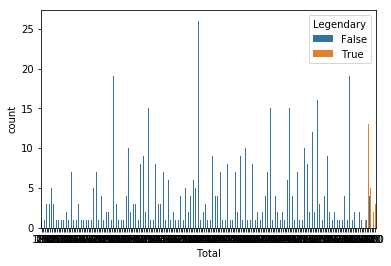

In [19]:
sns.countplot(x='Total', hue='Legendary', data=data)

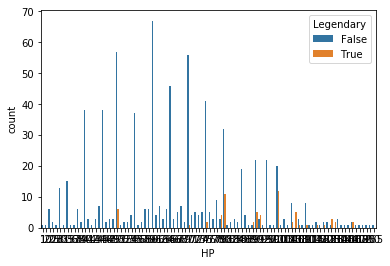

In [20]:
sns.countplot(x='HP', hue='Legendary', data=data)

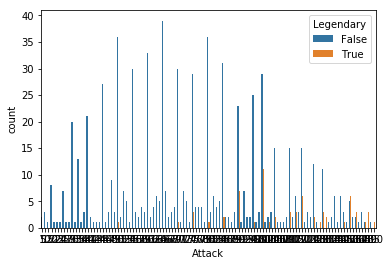

In [21]:
sns.countplot(x='Attack', hue='Legendary', data=data)

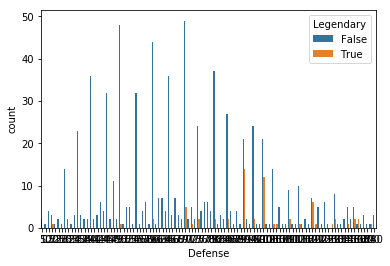

In [22]:
sns.countplot(x='Defense', hue='Legendary', data=data)

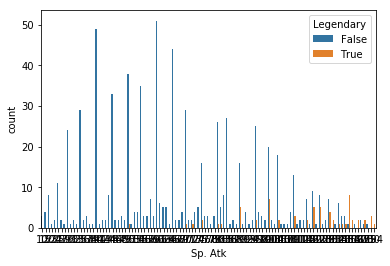

In [23]:
sns.countplot(x='Sp. Atk', hue='Legendary', data=data)

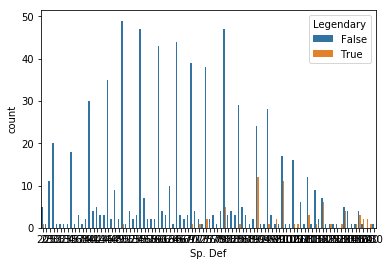

In [24]:
sns.countplot(x='Sp. Def', hue='Legendary', data=data)

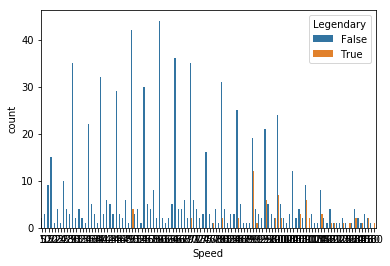

In [25]:
sns.countplot(x='Speed', hue='Legendary', data=data)

In [26]:
label = preprocessing.LabelEncoder() 
  
data["Type 1"]= label.fit_transform(data["Type 1"])
data["Type 2"]= label.fit_transform(data["Type 2"])
data["Legendary"]= label.fit_transform(data["Legendary"])
data["Name"]= label.fit_transform(data["Name"])

In [27]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,80,9,13,318,45,49,49,65,65,45,1,0
1,2,329,9,13,405,60,62,63,80,80,60,1,0
2,3,745,9,13,525,80,82,83,100,100,80,1,0
3,3,746,9,13,625,80,100,123,122,120,80,1,0
4,4,102,6,18,309,39,52,43,60,50,65,1,0


In [28]:
data.drop(["#"] , axis=1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,80,9,13,318,45,49,49,65,65,45,1,0
1,329,9,13,405,60,62,63,80,80,60,1,0
2,745,9,13,525,80,82,83,100,100,80,1,0
3,746,9,13,625,80,100,123,122,120,80,1,0
4,102,6,18,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,160,15,4,600,50,100,150,100,150,50,6,1
796,161,15,4,700,50,160,110,160,110,110,6,1
797,314,14,8,600,80,110,60,150,130,70,6,1
798,315,14,1,680,80,160,60,170,130,80,6,1


<function matplotlib.pyplot.xticks(*args, **kwargs)>

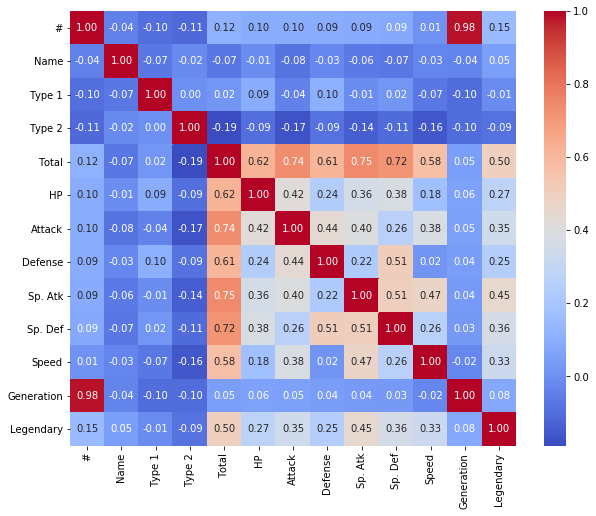

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks

In [30]:
data_majority = data[data["Legendary"]==0]
data_minority = data[data["Legendary"]==1]
 

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=30) # reproducible results
 

data = pd.concat([data_majority, data_minority_upsampled])
data["Legendary"].value_counts()

0    735
1    700
Name: Legendary, dtype: int64

In [31]:
y=data.Legendary.values

In [32]:
x=data.drop(["Legendary"] , axis=1).values

In [33]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

G:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.100125,0.529412,0.722222,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0
1,0.001389,0.411765,0.529412,0.722222,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0
2,0.002778,0.932416,0.529412,0.722222,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0
3,0.002778,0.933667,0.529412,0.722222,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0.0
4,0.004167,0.127660,0.352941,1.000000,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1148, 12)
x test:  (287, 12)
y train:  (1148,)
y test:  (287,)


In [36]:
def model(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("train score",model.score(x_train,y_train) )
    print("test score" , model.score(x_test,y_test))
    print(classification_report(y_test,pred))

In [37]:
tree=DecisionTreeClassifier(max_depth=5)

In [38]:
model(tree)

train score 0.9799651567944251
test score 0.9721254355400697
             precision    recall  f1-score   support

          0       1.00      0.95      0.97       147
          1       0.95      1.00      0.97       140

avg / total       0.97      0.97      0.97       287



In [39]:
log=LogisticRegression(C=10)

In [40]:
model(log)

train score 0.9590592334494773
test score 0.9547038327526133
             precision    recall  f1-score   support

          0       0.97      0.94      0.96       147
          1       0.94      0.97      0.95       140

avg / total       0.96      0.95      0.95       287

